In [32]:
# library imports

# db con
from config import get_engine

# data
from analysis import get_scores

# file IO, data manip
import pandas as pd

## lin alg
import numpy as np

# visual
import matplotlib.pyplot as plt

In [2]:
# get data 
df = get_scores(classification='men 8 end')

In [3]:
# display

df.head()

,PivotedScoreID,GameID,EndNum,EndResult,Hammer,Score,TeamID,EventID,EventName,Year,EndMonth,FinalScore,EndSituation,OpponentTeamID,OpponentFinalScore,Win
0,751418,47846,1,-1,1,0,121243,5329,Red Deer Curling Classic,2018,11,6,0,123213,4,1.0
1,751420,47846,2,3,1,0,121243,5329,Red Deer Curling Classic,2018,11,6,-1,123213,4,1.0
2,751422,47846,3,-1,0,3,121243,5329,Red Deer Curling Classic,2018,11,6,2,123213,4,1.0
3,751424,47846,4,0,1,3,121243,5329,Red Deer Curling Classic,2018,11,6,1,123213,4,1.0
4,751426,47846,5,0,1,3,121243,5329,Red Deer Curling Classic,2018,11,6,1,123213,4,1.0


In [9]:
# scores with hammer

hammer = df.loc[(df.Hammer == 1) & (df.EndResult != 0)].copy()
times_with_hammer = hammer.groupby(['EventID','TeamID'])['TeamID'].count()
times_with_hammer = times_with_hammer.rename('HammerOppurtunities')

,PivotedScoreID,GameID,EndNum,EndResult,Hammer,Score,TeamID,EventID,EventName,Year,EndMonth,FinalScore,EndSituation,OpponentTeamID,OpponentFinalScore,Win
0,751418,47846,1,-1,1,0,121243,5329,Red Deer Curling Classic,2018,11,6,0,123213,4,1.0
1,751420,47846,2,3,1,0,121243,5329,Red Deer Curling Classic,2018,11,6,-1,123213,4,1.0
5,751428,47846,6,2,1,3,121243,5329,Red Deer Curling Classic,2018,11,6,1,123213,4,1.0
7,751432,47846,8,1,1,5,121243,5329,Red Deer Curling Classic,2018,11,6,1,123213,4,1.0
8,909960,58400,1,1,1,0,121243,5329,Red Deer Curling Classic,2018,11,1,0,127498,9,0.0


In [56]:
# scores without hammer

n_hammer = df.loc[(df.Hammer == 0) & (df.EndResult != 0)].copy()
times_without_hammer = n_hammer.groupby(['EventID','TeamID'])['TeamID'].count()
times_without_hammer = times_without_hammer.rename('NonHammerOppurtunities')

In [13]:
# 2 or more with hammer

conversions = df.loc[(df.Hammer==1) & (df.EndResult >= 2)].copy()
conversions.head()

,PivotedScoreID,GameID,EndNum,EndResult,Hammer,Score,TeamID,EventID,EventName,Year,EndMonth,FinalScore,EndSituation,OpponentTeamID,OpponentFinalScore,Win
1,751420,47846,2,3,1,0,121243,5329,Red Deer Curling Classic,2018,11,6,-1,123213,4,1.0
5,751428,47846,6,2,1,3,121243,5329,Red Deer Curling Classic,2018,11,6,1,123213,4,1.0
17,1068344,68955,5,2,1,2,121243,5329,Red Deer Curling Classic,2018,11,8,0,123321,2,1.0
24,1226740,79508,6,2,1,1,121243,5329,Red Deer Curling Classic,2018,11,3,-4,123317,6,0.0
34,887344,56897,2,2,1,0,121252,5329,Red Deer Curling Classic,2018,11,8,-1,123716,7,1.0


In [14]:
times_converted = conversions.groupby(['EventID','TeamID'])['TeamID'].count()
times_converted = times_converted.rename('HammersConverted')

In [53]:
# steals given up

steals_given = df.loc[(df.Hammer==1) & (df.EndResult < 0)].copy()

total_steals_given = steals_given.groupby(['EventID','TeamID'])['TeamID'].count()
total_steals_given = total_steals_given.rename('StealsAllowed')

In [54]:
# steals taken

steals_taken = df.loc[(df.Hammer==0) & (df.EndResult>0)].copy()

total_steals_taken = steals_taken.groupby(['EventID','TeamID'])['TeamID'].count()
total_steals_taken = total_steals_taken.rename('StealsTaken')

In [43]:
# wins 

wins = df.drop_duplicates(subset=['EventID','TeamID','GameID']).groupby(['EventID','TeamID'])['Win'].sum()

In [84]:
stats = pd.concat([times_with_hammer,times_without_hammer,times_converted,total_steals_given,wins,total_steals_taken],axis=1)
stats.head()

HammerOppurtunities  NonHammerOppurtunities  HammersConverted  \
EventID TeamID                                                                  
5271    126196                    7                     7.0               2.0   
        126197                   28                    20.0               7.0   
        126198                   13                    13.0               5.0   
        126199                   17                    15.0               6.0   
        126200                   17                    19.0               5.0   

                StealsAllowed  Win  StealsTaken  
EventID TeamID                                   
5271    126196            4.0  0.0          1.0  
        126197           12.0  4.0          5.0  
        126198            4.0  1.0          4.0  
        126199            4.0  3.0          3.0  
        126200            6.0  2.0          7.0

In [85]:
stats['ConversionRate'] = (stats['HammersConverted'] / stats['HammerOppurtunities']).replace(np.nan,0)
stats['DefenseRate'] = (stats['StealsAllowed'] / stats['HammerOppurtunities']).replace(np.nan,0)
stats['StealRate'] =(stats['StealsTaken'] / stats['NonHammerOppurtunities']).replace(np.nan,0)

In [59]:
stats.head()

HammerOppurtunities  NonHammerOppurtunities  HammersConverted  \
EventID TeamID                                                                  
5271    126196                    7                     7.0               2.0   
        126197                   28                    20.0               7.0   
        126198                   13                    13.0               5.0   
        126199                   17                    15.0               6.0   
        126200                   17                    19.0               5.0   

                StealsAllowed  Win  StealsTaken  ConversionRate  DefenseRate  \
EventID TeamID                                                                 
5271    126196            4.0  0.0          1.0        0.285714     0.571429   
        126197           12.0  4.0          5.0        0.250000     0.428571   
        126198            4.0  1.0          4.0        0.384615     0.307692   
        126199            4.0  3.0          3.0        0.352941     0.235294   
        126200            6.0  2.0          7.0        0.294118     0.352941   

                StealRate  
EventID TeamID             
5271    126196   0.142857  
        126197   0.250000  
        126198   0.307692  
        126199   0.200000  
        126200   0.368421

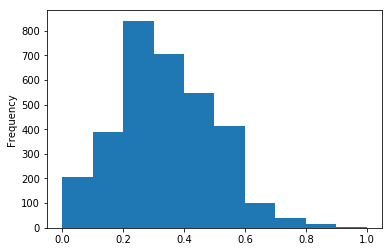

In [50]:
stats.ConversionRate.plot(kind='hist')

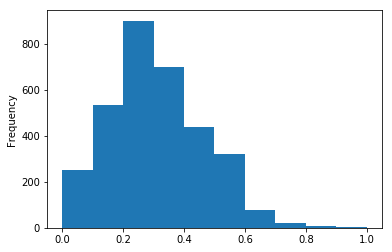

In [51]:
stats.DefenseRate.plot(kind='hist')

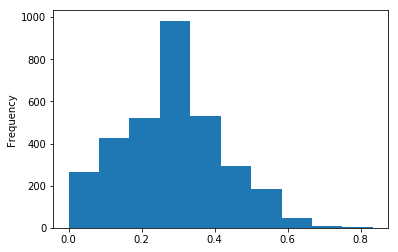

In [60]:
stats.StealRate.plot(kind='hist')

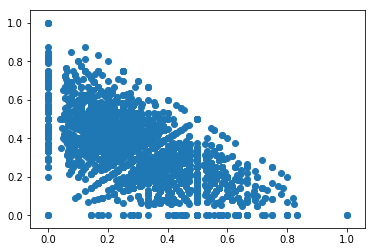

In [52]:
plt.scatter(stats.DefenseRate,stats.ConversionRate)

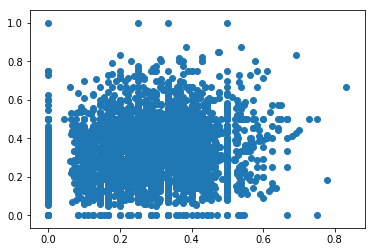

In [62]:
plt.scatter(stats.StealRate,stats.ConversionRate)

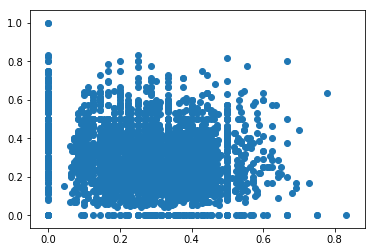

In [63]:
plt.scatter(stats.StealRate,stats.DefenseRate)

In [64]:
pd.cut

<function pandas.core.reshape.tile.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise')>

In [65]:
stats

HammerOppurtunities  NonHammerOppurtunities  HammersConverted  \
EventID TeamID                                                                  
5271    126196                    7                     7.0               2.0   
        126197                   28                    20.0               7.0   
        126198                   13                    13.0               5.0   
        126199                   17                    15.0               6.0   
        126200                   17                    19.0               5.0   
        126201                   15                    18.0               3.0   
        126202                   10                    12.0               2.0   
        126203                   21                    19.0               6.0   
        126204                   11                     9.0               2.0   
        126205                   16                    26.0               7.0   
        126206                   11                    14.0               5.0   
        126207                   17                    20.0               8.0   
        126208                   13                    18.0               1.0   
        126209                   19                    12.0               4.0   
        126210                   24                    24.0              15.0   
        126219                   18                    11.0               6.0   
5276    124371                   16                    19.0              11.0   
        124372                   15                    16.0               8.0   
        124373                   18                    22.0               7.0   
        124374                   18                    16.0               9.0   
        124375                   19                    17.0              15.0   
        124376                   17                    21.0               6.0   
        124377                   17                    24.0              11.0   
        124378                   14                    13.0               6.0   
        124379                   11                    23.0               7.0   
        124380                   24                    20.0               9.0   
        124381                   19                    18.0               7.0   
        124382                   16                    13.0               4.0   
        124383                   25                    19.0               9.0   
        124384                   14                    12.0               8.0   
...                             ...                     ...               ...   
6798    150570                    9                    12.0               2.0   
        150571                   13                    16.0               3.0   
        150572                   13                    10.0               6.0   
        150573                   15                    16.0              10.0   
        150574                   11                    15.0               4.0   
        150575                   14                    12.0               4.0   
        150576                   15                    18.0               9.0   
        150577                   13                    14.0               3.0   
        150578                   16                     9.0               4.0   
        150579                   15                    12.0               4.0   
6799    150674                   15                    17.0               8.0   
        150675                   13                    12.0               9.0   
        150676                   15                    18.0               4.0   
        150677                   17                    11.0               1.0   
        150678                   11                    13.0               NaN   
        150680                   12                    18.0               3.0   
        150681                   14            

In [67]:
stats.describe()

,HammerOppurtunities,NonHammerOppurtunities,HammersConverted,StealsAllowed,Win,StealsTaken,ConversionRate,DefenseRate,StealRate
count,3260.000000,3259.000000,3172.000000,3158.000000,3260.000000,3054.000000,3260.000000,3260.000000,3260.000000
mean,14.582515,14.586990,5.123266,4.552882,2.325153,4.707924,0.334932,0.306118,0.282308
std,4.938928,5.713652,2.917601,2.396853,1.746898,2.833372,0.160191,0.154514,0.139485
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11.000000,11.000000,3.000000,3.000000,1.000000,3.000000,0.222222,0.200000,0.187500
50%,14.000000,14.000000,5.000000,4.000000,2.000000,4.000000,0.333333,0.300000,0.285714
75%,18.000000,18.000000,7.000000,6.000000,3.000000,6.000000,0.437500,0.400000,0.375000
max,38.000000,43.000000,19.000000,20.000000,10.000000,20.000000,1.000000,1.000000,0.833333


In [77]:
stats['WinQ'] = None

In [96]:
for event_id in stats.index.get_level_values(0).unique():
    stats.loc[event_id,'WinQ'] = pd.qcut(stats.loc(axis=0)[event_id,:].Win,q=4,duplicates='drop')

In [97]:
stats

HammerOppurtunities  NonHammerOppurtunities  HammersConverted  \
EventID TeamID                                                                  
5271    126196                    7                     7.0               2.0   
        126197                   28                    20.0               7.0   
        126198                   13                    13.0               5.0   
        126199                   17                    15.0               6.0   
        126200                   17                    19.0               5.0   
        126201                   15                    18.0               3.0   
        126202                   10                    12.0               2.0   
        126203                   21                    19.0               6.0   
        126204                   11                     9.0               2.0   
        126205                   16                    26.0               7.0   
        126206                   11                    14.0               5.0   
        126207                   17                    20.0               8.0   
        126208                   13                    18.0               1.0   
        126209                   19                    12.0               4.0   
        126210                   24                    24.0              15.0   
        126219                   18                    11.0               6.0   
5276    124371                   16                    19.0              11.0   
        124372                   15                    16.0               8.0   
        124373                   18                    22.0               7.0   
        124374                   18                    16.0               9.0   
        124375                   19                    17.0              15.0   
        124376                   17                    21.0               6.0   
        124377                   17                    24.0              11.0   
        124378                   14                    13.0               6.0   
        124379                   11                    23.0               7.0   
        124380                   24                    20.0               9.0   
        124381                   19                    18.0               7.0   
        124382                   16                    13.0               4.0   
        124383                   25                    19.0               9.0   
        124384                   14                    12.0               8.0   
...                             ...                     ...               ...   
6798    150570                    9                    12.0               2.0   
        150571                   13                    16.0               3.0   
        150572                   13                    10.0               6.0   
        150573                   15                    16.0              10.0   
        150574                   11                    15.0               4.0   
        150575                   14                    12.0               4.0   
        150576                   15                    18.0               9.0   
        150577                   13                    14.0               3.0   
        150578                   16                     9.0               4.0   
        150579                   15                    12.0               4.0   
6799    150674                   15                    17.0               8.0   
        150675                   13                    12.0               9.0   
        150676                   15                    18.0               4.0   
        150677                   17                    11.0               1.0   
        150678                   11                    13.0               NaN   
        150680                   12                    18.0               3.0   
        150681                   14            

In [98]:
stats.WinQ.unique()

array([Interval(-0.001, 1.0, closed='right'),
       Interval(3.25, 6.0, closed='right'),
       Interval(2.5, 3.25, closed='right'),
       Interval(1.0, 2.5, closed='right'),
       Interval(4.0, 6.0, closed='right'),
       Interval(1.0, 3.0, closed='right'),
       Interval(3.0, 4.0, closed='right'),
       Interval(4.0, 8.0, closed='right'),
       Interval(1.5, 2.0, closed='right'),
       Interval(2.0, 3.0, closed='right'),
       Interval(4.0, 7.0, closed='right'),
       Interval(1.0, 2.0, closed='right'),
       Interval(3.0, 6.0, closed='right'),
       Interval(2.5, 4.0, closed='right'),
       Interval(-0.001, 2.0, closed='right'),
       Interval(3.0, 7.0, closed='right'),
       Interval(2.5, 3.0, closed='right'),
       Interval(3.0, 8.0, closed='right'),
       Interval(2.0, 4.0, closed='right'),
       Interval(4.0, 5.0, closed='right'),
       Interval(2.0, 3.5, closed='right'),
       Interval(0.5, 2.0, closed='right'),
       Interval(3.5, 6.0, closed='right'),
   